In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# svm.svc
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

#### Carregando dataset

In [28]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']
df = pd.read_csv('adult.data', names= cols, na_values='?', sep=',\s+', engine='python')

#### Analisando dados

In [29]:
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
label             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64

In [32]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


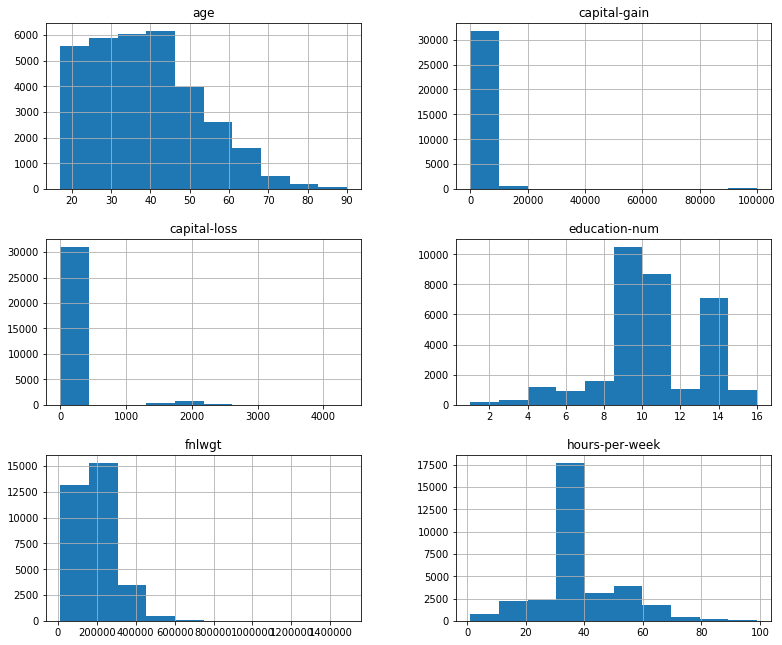

In [33]:
df.hist(bins=10,figsize=(13,11));

## Pre-Processamento

inserindo o valor mais frequente nas features faltantes

In [34]:
for column in ['workclass', 'occupation', 'native-country']:
    df[column] = df[column].replace(np.nan, df[column].mode()[0])

In [35]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

Deletando fetura 'education', featura 'education-num' representa os mesmos dados

In [36]:
df.drop(labels=['education'], axis=1, inplace=True)

## Alterando colunas categoricas

Selecionando colunas catagoricas

In [37]:
columns_cat  = df.select_dtypes(['object']).columns

#### alterando label para binaria <br/>
<50k = 0 | >50k = 1

In [38]:
df['label'] = pd.get_dummies(df['label'], drop_first=True)

#### Alterando valores categoricas para binarias

In [39]:
df = pd.get_dummies(df, columns=columns_cat, prefix=columns_cat, drop_first=True)

In [40]:
df.corr().style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)

## Separação

In [41]:
X = df.values[:,:-1]
y = df.values[:,-1]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify = y, random_state=42 )

In [43]:
std = StandardScaler()

### Stantartizando

In [60]:
X_train_std = std.fit_transform(np.float64(X_train))
X_test_std = std.transform(np.float64(X_test))

### Criando Modelos

In [54]:
modelos = {}
modelos['SGDClassifier'] = {'model': SGDClassifier(max_iter=1000,tol=0.01), 'predic': [], 'acuracy': 0}
modelos['Perceptron'] = {'model': Perceptron(tol=0.01, max_iter=1000), 'predic': [], 'acuracy': 0}
modelos['LogisticRegression'] = {'model': LogisticRegression(solver='lbfgs', max_iter=1000), 'predic': [], 'acuracy': 0}
modelos['SVM'] = {'model': svm.SVC(gamma='auto'), 'predic': [], 'acuracy': 0}
modelos['GaussianNB'] = {'model': GaussianNB(), 'predic': [], 'acuracy': 0}
modelos['KNeighborsClassifer'] = {'model': KNeighborsClassifier(n_neighbors=3), 'predic': [], 'acuracy': 0}
modelos['DecisionTreeClassifier'] = {'model': DecisionTreeClassifier(), 'predic': [], 'acuracy': 0}

In [61]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

### Calculando accuracy utilizando K-Fold Cross Validation

In [62]:
%%time
print('Acuracy')
print('-'*44)
for model in modelos:
    pipeline = Pipeline([('transformer', std), ('estimator', modelos[model]['model'])])
    acc3 = cross_val_score(pipeline, np.float64(X), y, cv=cv, scoring='accuracy')
    print(model,' '*(22-model.__len__()),'|',np.mean(acc3))
    print('-'*44)

Acuracy
--------------------------------------------
SGDClassifier           | 0.8352629318946685
--------------------------------------------
Perceptron              | 0.7953079665654516
--------------------------------------------
LogisticRegression      | 0.8507722930627122
--------------------------------------------
SVM                     | 0.8499737908420544
--------------------------------------------
GaussianNB              | 0.4471627101118119
--------------------------------------------
KNeighborsClassifer     | 0.8191087160398538
--------------------------------------------
DecisionTreeClassifier  | 0.8160375384177779
--------------------------------------------
CPU times: user 5min 48s, sys: 1.43 s, total: 5min 50s
Wall time: 5min 37s


#### Sem K-ford

In [57]:
%%time
for model in modelos:
    modelos[model]['model'].fit(X_train_std,y_train)
    modelos[model]['predic'] = modelos[model]['model'].predict(X_test_std)

CPU times: user 1min 10s, sys: 164 ms, total: 1min 10s
Wall time: 1min 9s


In [58]:
%%time
for model in modelos:
    modelos[model]['acuracy'] = metrics.accuracy_score(y_test,modelos[model]['predic'])

CPU times: user 6.63 ms, sys: 0 ns, total: 6.63 ms
Wall time: 6.42 ms


In [59]:
%%time
print('Acuracy')
print('-'*44)
for model in modelos:
    print(model,' '*(22-model.__len__()),'|',modelos[model]['acuracy'])
    print('-'*44)

Acuracy
--------------------------------------------
SGDClassifier           | 0.8385947672276133
--------------------------------------------
Perceptron              | 0.797322196290382
--------------------------------------------
LogisticRegression      | 0.8538263112639725
--------------------------------------------
SVM                     | 0.8496499201572288
--------------------------------------------
GaussianNB              | 0.3773492199975433
--------------------------------------------
KNeighborsClassifer     | 0.8205380174425746
--------------------------------------------
DecisionTreeClassifier  | 0.8143962658150105
--------------------------------------------
CPU times: user 2.27 ms, sys: 6 µs, total: 2.27 ms
Wall time: 1.93 ms
